In [87]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import pandas as pd

features_df = pd.read_csv('/home/yduan/5aS9/Apprentissage_supervise/acsincome_ca_features.csv')
labels_df = pd.read_csv('/home/yduan/5aS9/Apprentissage_supervise/acsincome_ca_labels.csv')

data = pd.concat([features_df, labels_df], axis=1)
num_samples = int(len(data) * 0.1)

data_male = data[data['SEX'] == 1]
data_female = data[data['SEX'] == 2]

X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(data_male.drop('PINCP', axis=1)[:num_samples], data_male['PINCP'][:num_samples], test_size=0.2, random_state=42)
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(data_female.drop('PINCP', axis=1)[:num_samples], data_female['PINCP'][:num_samples], test_size=0.2, random_state=42)

In [88]:
svm_model = SVC(C=10, kernel='rbf')
rf_model = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators=100)
ab_model = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.5, n_estimators=20)
gb_model = GradientBoostingClassifier(criterion="friedman_mse", learning_rate= 0.5, loss='log_loss', n_estimators=50, subsample=1.0)

svm_model.fit(X_train_male, y_train_male)
rf_model.fit(X_train_male, y_train_male)
ab_model.fit(X_train_male, y_train_male)
gb_model.fit(X_train_male, y_train_male)

y_pred_svm_male = svm_model.predict(X_test_male)
y_pred_rf_male = rf_model.predict(X_test_male)
y_pred_ab_male = ab_model.predict(X_test_male)
y_pred_gb_male = gb_model.predict(X_test_male)

confusion_svm_male = confusion_matrix(y_test_male, y_pred_svm_male)
confusion_rf_male = confusion_matrix(y_test_male, y_pred_rf_male)
confusion_ab_male = confusion_matrix(y_test_male, y_pred_ab_male)
confusion_gb_male = confusion_matrix(y_test_male, y_pred_gb_male)

print("Matrice de confusion SVM (Homme):\n", confusion_svm_male)
print("Matrice de confusion Random Forest (Homme):\n", confusion_rf_male)
print("Matrice de confusion Adaboost (Homme):\n", confusion_ab_male)
print("Matrice de confusion Gradient Boosting (Homme):\n", confusion_gb_male)

Matrice de confusion SVM (Homme):
 [[2000  350]
 [ 697  867]]
Matrice de confusion Random Forest (Homme):
 [[1944  406]
 [ 329 1235]]
Matrice de confusion Adaboost (Homme):
 [[1961  389]
 [ 341 1223]]
Matrice de confusion Gradient Boosting (Homme):
 [[1998  352]
 [ 330 1234]]


In [89]:
svm_model.fit(X_train_female, y_train_female)
rf_model.fit(X_train_female, y_train_female)
ab_model.fit(X_train_female, y_train_female)
gb_model.fit(X_train_female, y_train_female)

y_pred_svm_female = svm_model.predict(X_test_female)
y_pred_rf_female = rf_model.predict(X_test_female)
y_pred_ab_female = ab_model.predict(X_test_female)
y_pred_gb_female = gb_model.predict(X_test_female)

confusion_svm_female = confusion_matrix(y_test_female, y_pred_svm_female)
confusion_rf_female = confusion_matrix(y_test_female, y_pred_rf_female)
confusion_ab_female = confusion_matrix(y_test_female, y_pred_ab_female)
confusion_gb_female = confusion_matrix(y_test_female, y_pred_gb_female)

print("Matrice de confusion SVM (Femme):\n", confusion_svm_female)
print("Matrice de confusion Random Forest (Femme):\n", confusion_rf_female)
print("Matrice de confusion Adaboost (Femme):\n", confusion_ab_female)
print("Matrice de confusion Gradient Boosting (Femme):\n", confusion_gb_female)

Matrice de confusion SVM (Femme):
 [[2368  300]
 [ 643  603]]
Matrice de confusion Random Forest (Femme):
 [[2361  307]
 [ 346  900]]
Matrice de confusion Adaboost (Femme):
 [[2373  295]
 [ 409  837]]
Matrice de confusion Gradient Boosting (Femme):
 [[2353  315]
 [ 325  921]]


In [90]:
y_pred_train_svm_male = svm_model.predict(X_train_male)
y_pred_train_rf_male = rf_model.predict(X_train_male)
y_pred_train_ab_male = ab_model.predict(X_train_male)
y_pred_train_gb_male = gb_model.predict(X_train_male)

y_pred_train_svm_female = svm_model.predict(X_train_female)
y_pred_train_rf_female = rf_model.predict(X_train_female)
y_pred_train_ab_female = ab_model.predict(X_train_female)
y_pred_train_gb_female = gb_model.predict(X_train_female)

accuracy_train_svm_male = accuracy_score(y_train_male, y_pred_train_svm_male)
accuracy_train_rf_male = accuracy_score(y_train_male, y_pred_train_rf_male)
accuracy_train_ab_male = accuracy_score(y_train_male, y_pred_train_ab_male)
accuracy_train_gb_male = accuracy_score(y_train_male, y_pred_train_gb_male)

accuracy_train_svm_female = accuracy_score(y_train_female, y_pred_train_svm_female)
accuracy_train_rf_female = accuracy_score(y_train_female, y_pred_train_rf_female)
accuracy_train_ab_female = accuracy_score(y_train_female, y_pred_train_ab_female)
accuracy_train_gb_female = accuracy_score(y_train_female, y_pred_train_gb_female)

print("Accuracy Train SVM (Homme):", accuracy_train_svm_male)
print("Accuracy Train Random Forest (Homme):", accuracy_train_rf_male)
print("Accuracy Train Adaboost (Homme):", accuracy_train_ab_male)
print("Accuracy Train Gradient Boosting (Homme):", accuracy_train_gb_male)

print("Accuracy Train SVM (Femme):", accuracy_train_svm_female)
print("Accuracy Train Random Forest (Femme):", accuracy_train_rf_female)
print("Accuracy Train Adaboost (Femme):", accuracy_train_ab_female)
print("Accuracy Train Gradient Boosting (Femme):", accuracy_train_gb_female)

Accuracy Train SVM (Homme): 0.7313442371581906
Accuracy Train Random Forest (Homme): 0.7989394326603629
Accuracy Train Adaboost (Homme): 0.785969844109379
Accuracy Train Gradient Boosting (Homme): 0.8041144901610018
Accuracy Train SVM (Femme): 0.7510861231791465
Accuracy Train Random Forest (Femme): 0.8771403015589062
Accuracy Train Adaboost (Femme): 0.8241119345770509
Accuracy Train Gradient Boosting (Femme): 0.8538205980066446


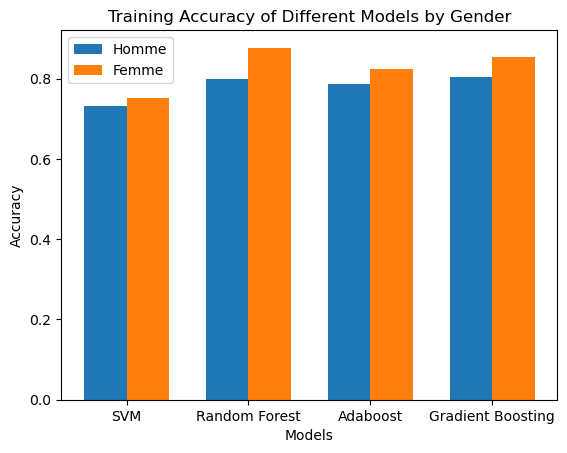

In [91]:
import matplotlib.pyplot as plt

models = ['SVM', 'Random Forest', 'Adaboost', 'Gradient Boosting']
accuracy_male = [accuracy_train_svm_male, accuracy_train_rf_male, accuracy_train_ab_male, accuracy_train_gb_male]
accuracy_female = [accuracy_train_svm_female, accuracy_train_rf_female, accuracy_train_ab_female, accuracy_train_gb_female]

bar_width = 0.35
index = range(len(models))

fig, ax = plt.subplots()
bar1 = ax.bar(index, accuracy_male, bar_width, label='Homme')
bar2 = ax.bar([i + bar_width for i in index], accuracy_female, bar_width, label='Femme')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Training Accuracy of Different Models by Gender')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(models)
ax.legend()

plt.show()


In [92]:
accuracy_test_svm_male = accuracy_score(y_test_male, y_pred_svm_male)
accuracy_test_rf_male = accuracy_score(y_test_male, y_pred_rf_male)
accuracy_test_ab_male = accuracy_score(y_test_male, y_pred_ab_male)
accuracy_test_gb_male = accuracy_score(y_test_male, y_pred_gb_male)
accuracy_test_male = [accuracy_test_svm_male, accuracy_test_rf_male, accuracy_test_ab_male, accuracy_test_gb_male]

accuracy_test_svm_female = accuracy_score(y_test_female, y_pred_svm_female)
accuracy_test_rf_female = accuracy_score(y_test_female, y_pred_rf_female)
accuracy_test_ab_female = accuracy_score(y_test_female, y_pred_ab_female)
accuracy_test_gb_female = accuracy_score(y_test_female, y_pred_gb_female)
accuracy_test_female = [accuracy_test_svm_female, accuracy_test_rf_female, accuracy_test_ab_female, accuracy_test_gb_female]

print("Accuracy Test SVM (Homme):", accuracy_test_svm_male)
print("Accuracy Test Random Forest (Homme):", accuracy_test_rf_male)
print("Accuracy Test Adaboost (Homme):", accuracy_test_ab_male)
print("Accuracy Test Gradient Boosting (Homme):", accuracy_test_gb_male)

print("Accuracy Test SVM (Femme):", accuracy_test_svm_female)
print("Accuracy Test Random Forest (Femme):", accuracy_test_rf_female)
print("Accuracy Test Adaboost (Femme):", accuracy_test_ab_female)
print("Accuracy Test Gradient Boosting (Femme):", accuracy_test_gb_female)

Accuracy Test SVM (Homme): 0.7324987225344916
Accuracy Test Random Forest (Homme): 0.812212570260603
Accuracy Test Adaboost (Homme): 0.8134900357690342
Accuracy Test Gradient Boosting (Homme): 0.8257537046499744
Accuracy Test SVM (Femme): 0.759070005109862
Accuracy Test Random Forest (Femme): 0.8331630045988758
Accuracy Test Adaboost (Femme): 0.8201328564128768
Accuracy Test Gradient Boosting (Femme): 0.8364844149207972


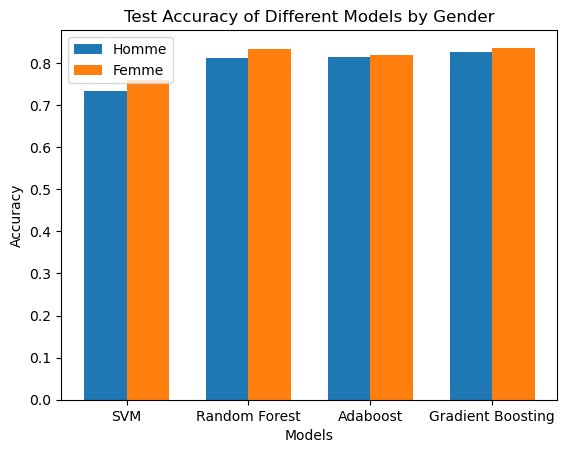

In [93]:
accuracy_male = [accuracy_test_svm_male, accuracy_test_rf_male, accuracy_test_ab_male, accuracy_test_gb_male]
accuracy_female = [accuracy_test_svm_female, accuracy_test_rf_female, accuracy_test_ab_female, accuracy_test_gb_female]

bar_width = 0.35
index = range(len(models))

fig, ax = plt.subplots()
bar1 = ax.bar(index, accuracy_male, bar_width, label='Homme')
bar2 = ax.bar([i + bar_width for i in index], accuracy_female, bar_width, label='Femme')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Test Accuracy of Different Models by Gender')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(models)
ax.legend()

plt.show()

In [94]:
classification_rep_train_svm_male = classification_report(y_train_male, y_pred_train_svm_male)
classification_rep_train_rf_male = classification_report(y_train_male, y_pred_train_rf_male)
classification_rep_train_ab_male = classification_report(y_train_male, y_pred_train_ab_male)
classification_rep_train_gb_male = classification_report(y_train_male, y_pred_train_gb_male)

classification_rep_train_svm_female = classification_report(y_train_female, y_pred_train_svm_female)
classification_rep_train_rf_female = classification_report(y_train_female, y_pred_train_rf_female)
classification_rep_train_ab_female = classification_report(y_train_female, y_pred_train_ab_female)
classification_rep_train_gb_female = classification_report(y_train_female, y_pred_train_gb_female)

print("Classification report Train SVM (Homme):\n", classification_rep_train_svm_male)
print("Classification report Train Random Forest (Homme):\n", classification_rep_train_rf_male)
print("Classification report Train Adaboost (Homme):\n", classification_rep_train_ab_male)
print("Classification report Train Gradient Boosting (Homme):\n", classification_rep_train_gb_male)

print("Classification report Train SVM (Femme):\n", classification_rep_train_svm_female)
print("Classification report Train Random Forest (Femme):\n", classification_rep_train_rf_female)
print("Classification report Train Adaboost (Femme):\n", classification_rep_train_ab_female)
print("Classification report Train Gradient Boosting (Femme):\n", classification_rep_train_gb_female)

Classification report Train SVM (Homme):
               precision    recall  f1-score   support

       False       0.72      0.89      0.80      9292
        True       0.75      0.51      0.60      6360

    accuracy                           0.73     15652
   macro avg       0.74      0.70      0.70     15652
weighted avg       0.74      0.73      0.72     15652

Classification report Train Random Forest (Homme):
               precision    recall  f1-score   support

       False       0.78      0.92      0.84      9292
        True       0.84      0.63      0.72      6360

    accuracy                           0.80     15652
   macro avg       0.81      0.77      0.78     15652
weighted avg       0.80      0.80      0.79     15652

Classification report Train Adaboost (Homme):
               precision    recall  f1-score   support

       False       0.77      0.92      0.84      9292
        True       0.83      0.59      0.69      6360

    accuracy                           0.

In [95]:
classification_rep_test_svm_male = classification_report(y_test_male, y_pred_svm_male)
classification_rep_test_rf_male = classification_report(y_test_male, y_pred_rf_male)
classification_rep_test_ab_male = classification_report(y_test_male, y_pred_ab_male)
classification_rep_test_gb_male = classification_report(y_test_male, y_pred_gb_male)

classification_rep_test_svm_female = classification_report(y_test_female, y_pred_svm_female)
classification_rep_test_rf_female = classification_report(y_test_female, y_pred_rf_female)
classification_rep_test_ab_female = classification_report(y_test_female, y_pred_ab_female)
classification_rep_test_gb_female = classification_report(y_test_female, y_pred_gb_female)

print("Classification report Test SVM (Homme):\n", classification_rep_test_svm_male)
print("Classification report Test Random Forest (Homme):\n", classification_rep_test_rf_male)
print("Classification report Test Adaboost (Homme):\n", classification_rep_test_ab_male)
print("Classification report Test Gradient Boosting (Homme):\n", classification_rep_test_gb_male)

print("Classification report Test SVM (Femme):\n", classification_rep_test_svm_female)
print("Classification report Test Random Forest (Femme):\n", classification_rep_test_rf_female)
print("Classification report Test Adaboost (Femme):\n", classification_rep_test_ab_female)
print("Classification report Test Gradient Boosting (Femme):\n", classification_rep_test_gb_female)

Classification report Test SVM (Homme):
               precision    recall  f1-score   support

       False       0.74      0.85      0.79      2350
        True       0.71      0.55      0.62      1564

    accuracy                           0.73      3914
   macro avg       0.73      0.70      0.71      3914
weighted avg       0.73      0.73      0.73      3914

Classification report Test Random Forest (Homme):
               precision    recall  f1-score   support

       False       0.86      0.83      0.84      2350
        True       0.75      0.79      0.77      1564

    accuracy                           0.81      3914
   macro avg       0.80      0.81      0.81      3914
weighted avg       0.81      0.81      0.81      3914

Classification report Test Adaboost (Homme):
               precision    recall  f1-score   support

       False       0.85      0.83      0.84      2350
        True       0.76      0.78      0.77      1564

    accuracy                           0.81 

In [96]:

FP_svm_male = (confusion_svm_male[0, 1] / (confusion_svm_male[1, 1] + confusion_svm_male[0, 1])) 
FP_svm_female = (confusion_svm_female[0, 1] / (confusion_svm_female[1, 1] + confusion_svm_female[0, 1]))
FP_rf_male = (confusion_rf_male[0, 1] / (confusion_rf_male[1, 1] + confusion_rf_male[0, 1]))
FP_rf_female = (confusion_rf_female[0, 1]/(confusion_rf_female[1, 1] + confusion_rf_female[0, 1]))
FP_ab_male = (confusion_ab_male[0, 1] / (confusion_ab_male[1, 1] + confusion_ab_male[0, 1])) 
FP_ab_female = (confusion_ab_female[0, 1] / (confusion_ab_female[1, 1] + confusion_ab_female[0, 1]))
FP_gb_male = (confusion_gb_male[0, 1] / (confusion_gb_male[1, 1] + confusion_gb_male[0, 1]))
FP_gb_female = (confusion_gb_female[0, 1] / (confusion_gb_female[1, 1] + confusion_gb_female[0, 1]))

print("False Positive Ratio hommes et femmes (SVM):\n", FP_svm_male, "\n", FP_svm_female)
print("False Positive Ratio hommes et femmes (Random Forest):\n", FP_rf_male, "\n", FP_rf_female)
print("False Positive Ratio hommes et femmes (AdaBoost):\n", FP_ab_male, "\n", FP_ab_female)
print("False Positive Ratio hommes et femmes (Gradient Boosting):\n", FP_gb_male, "\n", FP_gb_female)

False Positive Ratio hommes et femmes (SVM):
 0.2875924404272802 
 0.33222591362126247
False Positive Ratio hommes et femmes (Random Forest):
 0.2474101157830591 
 0.2543496271748136
False Positive Ratio hommes et femmes (AdaBoost):
 0.2413151364764268 
 0.26060070671378094
False Positive Ratio hommes et femmes (Gradient Boosting):
 0.22194199243379573 
 0.25485436893203883


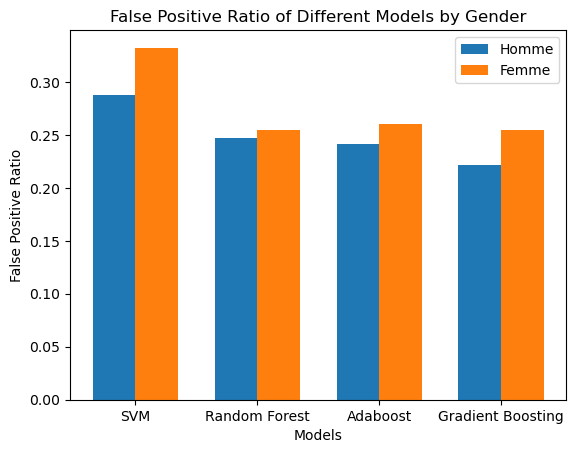

In [97]:
FP_ratio_male = [FP_svm_male, FP_rf_male, FP_ab_male, FP_gb_male]
FP_ratio_female = [FP_svm_female, FP_rf_female, FP_ab_female, FP_gb_female]

bar_width = 0.35
index = range(len(models))

fig, ax = plt.subplots()
bar1 = ax.bar(index, FP_ratio_male, bar_width, label='Homme')
bar2 = ax.bar([i + bar_width for i in index], FP_ratio_female, bar_width, label='Femme')

ax.set_xlabel('Models')
ax.set_ylabel('False Positive Ratio')
ax.set_title('False Positive Ratio of Different Models by Gender')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(models)
ax.legend()

plt.show()

In [98]:
# False Negative FN/FN+TP
FN_svm_male = (confusion_svm_male[1, 0] / (confusion_svm_male[0, 0] + confusion_svm_male[1, 0])) 
FN_svm_female = (confusion_svm_female[1, 0] / (confusion_svm_female[0, 0] + confusion_svm_female[1, 0]))
FN_rf_male = (confusion_rf_male[1, 0] / (confusion_rf_male[0, 0] + confusion_rf_male[1, 0]))
FN_rf_female = (confusion_rf_female[1, 0]/(confusion_rf_female[0, 0] + confusion_rf_female[1, 0]))
FN_ab_male = (confusion_ab_male[1, 0] / (confusion_ab_male[0, 0] + confusion_ab_male[1, 0])) 
FN_ab_female = (confusion_ab_female[1, 0] / (confusion_ab_female[0, 0] + confusion_ab_female[1, 0]))
FN_gb_male = (confusion_gb_male[1, 0] / (confusion_gb_male[0, 0] + confusion_gb_male[1, 0]))
FN_gb_female = (confusion_gb_female[1, 0] / (confusion_gb_female[0, 0] + confusion_gb_female[1, 0]))

print("False Negative Ratio hommes et femmes (SVM):\n", FN_svm_male, "\n", FN_svm_female)
print("False Negative Ratio hommes et femmes (Random Forest):\n", FN_rf_male, "\n", FN_rf_female)
print("False Negative Ratio hommes et femmes (AdaBoost):\n", FN_ab_male, "\n", FN_ab_female)
print("False Negative Ratio hommes et femmes (Gradient Boosting):\n", FN_gb_male, "\n", FN_gb_female)

False Negative Ratio hommes et femmes (SVM):
 0.25843529847979235 
 0.21355031550979742
False Negative Ratio hommes et femmes (Random Forest):
 0.14474263088429387 
 0.1278167713335796
False Negative Ratio hommes et femmes (AdaBoost):
 0.14813205907906168 
 0.14701653486700217
False Negative Ratio hommes et femmes (Gradient Boosting):
 0.14175257731958762 
 0.12135922330097088


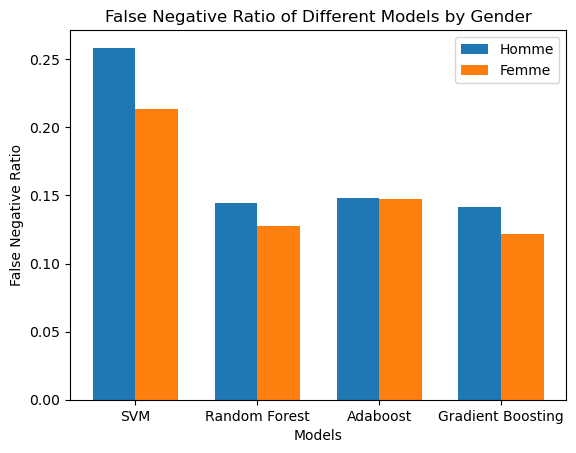

In [99]:
FN_ratio_male = [FN_svm_male, FN_rf_male, FN_ab_male, FN_gb_male]
FN_ratio_female = [FN_svm_female, FN_rf_female, FN_ab_female, FN_gb_female]

bar_width = 0.35
index = range(len(models))

fig, ax = plt.subplots()
bar1 = ax.bar(index, FN_ratio_male, bar_width, label='Homme')
bar2 = ax.bar([i + bar_width for i in index], FN_ratio_female, bar_width, label='Femme')

ax.set_xlabel('Models')
ax.set_ylabel('False Negative Ratio')
ax.set_title('False Negative Ratio of Different Models by Gender')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(models)
ax.legend()

plt.show()

# NO SEX

In [100]:
features_df_noSEX = pd.read_csv('/home/yduan/5aS9/Apprentissage_supervise/TP2-complementary_data/acsincome_ca_features_without_sex.csv')
labels_df_noSEX = pd.read_csv('/home/yduan/5aS9/Apprentissage_supervise/acsincome_ca_labels.csv')

In [101]:
data = pd.concat([features_df_noSEX, labels_df_noSEX], axis=1)
num_samples = int(len(data) * 0.1)
X_train, X_test, y_train, y_test = train_test_split(data.drop('PINCP', axis=1)[:num_samples], data['PINCP'][:num_samples], test_size=0.2, random_state=42)


## SVM

In [102]:
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
confusion_svm = confusion_matrix(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)
print("Matrice de confusion SVM:\n", confusion_svm)
print("Accuracy SVM:", accuracy_svm)
print("Classification report SVM:\n", classification_rep_svm)

Matrice de confusion SVM:
 [[2432  276]
 [ 630  576]]
Accuracy SVM: 0.7685232498722534
Classification report SVM:
               precision    recall  f1-score   support

       False       0.79      0.90      0.84      2708
        True       0.68      0.48      0.56      1206

    accuracy                           0.77      3914
   macro avg       0.74      0.69      0.70      3914
weighted avg       0.76      0.77      0.76      3914



## Random Forest

In [103]:
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
confusion_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
print("Matrice de confusion Random Forest:\n", confusion_rf)
print("Accuracy Random Forest:", accuracy_rf)
print("Classification report Random Forest:\n", classification_rep_rf)

Matrice de confusion Random Forest:
 [[2452  256]
 [ 333  873]]
Accuracy Random Forest: 0.8495145631067961
Classification report Random Forest:
               precision    recall  f1-score   support

       False       0.88      0.91      0.89      2708
        True       0.77      0.72      0.75      1206

    accuracy                           0.85      3914
   macro avg       0.83      0.81      0.82      3914
weighted avg       0.85      0.85      0.85      3914



## AdaBoost

In [104]:
ab_model.fit(X_train, y_train)
y_pred_ab = ab_model.predict(X_test)
confusion_ab = confusion_matrix(y_test, y_pred_ab)
accuracy_ab = accuracy_score(y_test, y_pred_ab)
classification_rep_ab = classification_report(y_test, y_pred_ab)
print("Matrice de confusion Adaboost:\n", confusion_ab)
print("Accuracy Adaboost:", accuracy_ab)
print("Classification report Adaboost:\n", classification_rep_ab)

Matrice de confusion Adaboost:
 [[2473  235]
 [ 392  814]]
Accuracy Adaboost: 0.8398058252427184
Classification report Adaboost:
               precision    recall  f1-score   support

       False       0.86      0.91      0.89      2708
        True       0.78      0.67      0.72      1206

    accuracy                           0.84      3914
   macro avg       0.82      0.79      0.80      3914
weighted avg       0.84      0.84      0.84      3914



## Gradient Boosting

In [105]:
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
confusion_gb = confusion_matrix(y_test, y_pred_gb)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)
print("Matrice de confusion Gradient Boosting:\n", confusion_gb)
print("Accuracy Gradient Boosting:", accuracy_gb)
print("Classification report Gradient Boosting:\n", classification_rep_gb)

Matrice de confusion Gradient Boosting:
 [[2431  277]
 [ 317  889]]
Accuracy Gradient Boosting: 0.8482370975983649
Classification report Gradient Boosting:
               precision    recall  f1-score   support

       False       0.88      0.90      0.89      2708
        True       0.76      0.74      0.75      1206

    accuracy                           0.85      3914
   macro avg       0.82      0.82      0.82      3914
weighted avg       0.85      0.85      0.85      3914



In [106]:
svm_model = SVC(C=1, kernel='rbf')
rf_model = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators=100)
ab_model = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.5, n_estimators=20)
gb_model = GradientBoostingClassifier(criterion="friedman_mse", learning_rate= 0.5, loss='log_loss', n_estimators=50, subsample=1.0)

In [107]:
features_df = pd.read_csv('/home/yduan/5aS9/Apprentissage_supervise/TP2-complementary_data/acsincome_ca_features_without_sex.csv')
labels_df = pd.read_csv('/home/yduan/5aS9/Apprentissage_supervise/acsincome_ca_labels.csv')
sex_df = pd.read_csv('/home/yduan/5aS9/Apprentissage_supervise/TP2-complementary_data/acsincome_ca_group_Sex.csv')

merged_df = pd.merge(features_df, sex_df, left_index=True, right_index=True)
merged_df = pd.merge(merged_df, labels_df, left_index=True, right_index=True)

male_data = merged_df[merged_df['SEX'] == 1].drop('SEX', axis=1)
female_data = merged_df[merged_df['SEX'] == 2].drop('SEX', axis=1)

X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(male_data.drop('PINCP', axis=1)[:num_samples], male_data['PINCP'][:num_samples], test_size=0.2, random_state=42)
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(female_data.drop('PINCP', axis=1)[:num_samples], female_data['PINCP'][:num_samples], test_size=0.2, random_state=42)
        


In [108]:
svm_model.fit(X_train_male, y_train_male)
rf_model.fit(X_train_male, y_train_male)
ab_model.fit(X_train_male, y_train_male)
gb_model.fit(X_train_male, y_train_male)

y_pred_svm_male = svm_model.predict(X_test_male)
y_pred_rf_male = rf_model.predict(X_test_male)
y_pred_ab_male = ab_model.predict(X_test_male)
y_pred_gb_male = gb_model.predict(X_test_male)

confusion_svm_male = confusion_matrix(y_test_male, y_pred_svm_male)
confusion_rf_male = confusion_matrix(y_test_male, y_pred_rf_male)
confusion_ab_male = confusion_matrix(y_test_male, y_pred_ab_male)
confusion_gb_male = confusion_matrix(y_test_male, y_pred_gb_male)

print("Matrice de confusion SVM (Homme):\n", confusion_svm_male)
print("Matrice de confusion Random Forest (Homme):\n", confusion_rf_male)
print("Matrice de confusion Adaboost (Homme):\n", confusion_ab_male)
print("Matrice de confusion Gradient Boosting (Homme):\n", confusion_gb_male)

Matrice de confusion SVM (Homme):
 [[1976  374]
 [ 738  826]]
Matrice de confusion Random Forest (Homme):
 [[1961  389]
 [ 325 1239]]
Matrice de confusion Adaboost (Homme):
 [[1961  389]
 [ 341 1223]]
Matrice de confusion Gradient Boosting (Homme):
 [[1998  352]
 [ 330 1234]]


In [109]:
svm_model.fit(X_train_female, y_train_female)
rf_model.fit(X_train_female, y_train_female)
ab_model.fit(X_train_female, y_train_female)
gb_model.fit(X_train_female, y_train_female)

y_pred_svm_female = svm_model.predict(X_test_female)
y_pred_rf_female = rf_model.predict(X_test_female)
y_pred_ab_female = ab_model.predict(X_test_female)
y_pred_gb_female = gb_model.predict(X_test_female)

confusion_svm_female = confusion_matrix(y_test_female, y_pred_svm_female)
confusion_rf_female = confusion_matrix(y_test_female, y_pred_rf_female)
confusion_ab_female = confusion_matrix(y_test_female, y_pred_ab_female)
confusion_gb_female = confusion_matrix(y_test_female, y_pred_gb_female)

print("Matrice de confusion SVM (Femme):\n", confusion_svm_female)
print("Matrice de confusion Random Forest (Femme):\n", confusion_rf_female)
print("Matrice de confusion Adaboost (Femme):\n", confusion_ab_female)
print("Matrice de confusion Gradient Boosting (Femme):\n", confusion_gb_female)

Matrice de confusion SVM (Femme):
 [[2409  259]
 [ 751  495]]
Matrice de confusion Random Forest (Femme):
 [[2380  288]
 [ 352  894]]
Matrice de confusion Adaboost (Femme):
 [[2373  295]
 [ 409  837]]
Matrice de confusion Gradient Boosting (Femme):
 [[2353  315]
 [ 325  921]]


In [110]:
saccuracy_test_svm_male = accuracy_score(y_test_male, y_pred_svm_male)
saccuracy_test_rf_male = accuracy_score(y_test_male, y_pred_rf_male)
saccuracy_test_ab_male = accuracy_score(y_test_male, y_pred_ab_male)
saccuracy_test_gb_male = accuracy_score(y_test_male, y_pred_gb_male)
saccuracy_test_male = [saccuracy_test_svm_male, saccuracy_test_rf_male, saccuracy_test_ab_male, saccuracy_test_gb_male]


saccuracy_test_svm_female = accuracy_score(y_test_female, y_pred_svm_female)
saccuracy_test_rf_female = accuracy_score(y_test_female, y_pred_rf_female)
saccuracy_test_ab_female = accuracy_score(y_test_female, y_pred_ab_female)
saccuracy_test_gb_female = accuracy_score(y_test_female, y_pred_gb_female)
saccuracy_test_female = [saccuracy_test_svm_female, saccuracy_test_rf_female, saccuracy_test_ab_female, saccuracy_test_gb_female]


print("Accuracy Test SVM (Homme):", accuracy_test_svm_male)
print("Accuracy Test Random Forest (Homme):", accuracy_test_rf_male)
print("Accuracy Test Adaboost (Homme):", accuracy_test_ab_male)
print("Accuracy Test Gradient Boosting (Homme):", accuracy_test_gb_male)

print("Accuracy Test SVM (Femme):", accuracy_test_svm_female)
print("Accuracy Test Random Forest (Femme):", accuracy_test_rf_female)
print("Accuracy Test Adaboost (Femme):", accuracy_test_ab_female)
print("Accuracy Test Gradient Boosting (Femme):", accuracy_test_gb_female)

Accuracy Test SVM (Homme): 0.7324987225344916
Accuracy Test Random Forest (Homme): 0.812212570260603
Accuracy Test Adaboost (Homme): 0.8134900357690342
Accuracy Test Gradient Boosting (Homme): 0.8257537046499744
Accuracy Test SVM (Femme): 0.759070005109862
Accuracy Test Random Forest (Femme): 0.8331630045988758
Accuracy Test Adaboost (Femme): 0.8201328564128768
Accuracy Test Gradient Boosting (Femme): 0.8364844149207972


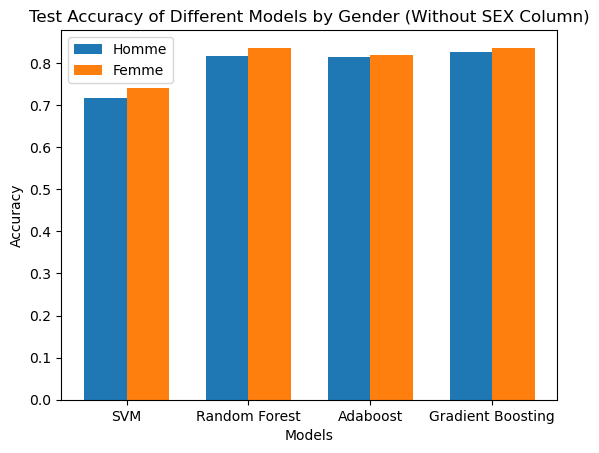

In [122]:

bar_width = 0.35
index = range(len(models))

fig, ax = plt.subplots()
bar1 = ax.bar(index, saccuracy_test_male, bar_width, label='Homme')
bar2 = ax.bar([i + bar_width for i in index], saccuracy_test_female, bar_width, label='Femme')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Test Accuracy of Different Models by Gender (Without SEX Column)')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(models)
ax.legend()

plt.show()

In [111]:
classification_rep_test_svm_male = classification_report(y_test_male, y_pred_svm_male)
classification_rep_test_rf_male = classification_report(y_test_male, y_pred_rf_male)
classification_rep_test_ab_male = classification_report(y_test_male, y_pred_ab_male)
classification_rep_test_gb_male = classification_report(y_test_male, y_pred_gb_male)

classification_rep_test_svm_female = classification_report(y_test_female, y_pred_svm_female)
classification_rep_test_rf_female = classification_report(y_test_female, y_pred_rf_female)
classification_rep_test_ab_female = classification_report(y_test_female, y_pred_ab_female)
classification_rep_test_gb_female = classification_report(y_test_female, y_pred_gb_female)

print("Classification report Test SVM (Homme):\n", classification_rep_test_svm_male)
print("Classification report Test Random Forest (Homme):\n", classification_rep_test_rf_male)
print("Classification report Test Adaboost (Homme):\n", classification_rep_test_ab_male)
print("Classification report Test Gradient Boosting (Homme):\n", classification_rep_test_gb_male)

print("Classification report Test SVM (Femme):\n", classification_rep_test_svm_female)
print("Classification report Test Random Forest (Femme):\n", classification_rep_test_rf_female)
print("Classification report Test Adaboost (Femme):\n", classification_rep_test_ab_female)
print("Classification report Test Gradient Boosting (Femme):\n", classification_rep_test_gb_female)

Classification report Test SVM (Homme):
               precision    recall  f1-score   support

       False       0.73      0.84      0.78      2350
        True       0.69      0.53      0.60      1564

    accuracy                           0.72      3914
   macro avg       0.71      0.68      0.69      3914
weighted avg       0.71      0.72      0.71      3914

Classification report Test Random Forest (Homme):
               precision    recall  f1-score   support

       False       0.86      0.83      0.85      2350
        True       0.76      0.79      0.78      1564

    accuracy                           0.82      3914
   macro avg       0.81      0.81      0.81      3914
weighted avg       0.82      0.82      0.82      3914

Classification report Test Adaboost (Homme):
               precision    recall  f1-score   support

       False       0.85      0.83      0.84      2350
        True       0.76      0.78      0.77      1564

    accuracy                           0.81 

In [112]:
# False Positive FP/FP+TN
sFP_svm_male = (confusion_svm_male[0, 1] / (confusion_svm_male[1, 1] + confusion_svm_male[0, 1])) 
sFP_svm_female = (confusion_svm_female[0, 1] / (confusion_svm_female[1, 1] + confusion_svm_female[0, 1]))
sFP_rf_male = (confusion_rf_male[0, 1] / (confusion_rf_male[1, 1] + confusion_rf_male[0, 1]))
sFP_rf_female = (confusion_rf_female[0, 1]/(confusion_rf_female[1, 1] + confusion_rf_female[0, 1]))
sFP_ab_male = (confusion_ab_male[0, 1] / (confusion_ab_male[1, 1] + confusion_ab_male[0, 1])) 
sFP_ab_female = (confusion_ab_female[0, 1] / (confusion_ab_female[1, 1] + confusion_ab_female[0, 1]))
sFP_gb_male = (confusion_gb_male[0, 1] / (confusion_gb_male[1, 1] + confusion_gb_male[0, 1]))
sFP_gb_female = (confusion_gb_female[0, 1] / (confusion_gb_female[1, 1] + confusion_gb_female[0, 1]))

print("False Positive Ratio hommes et femmes sans SEX (SVM):\n", sFP_svm_male, "\n", sFP_svm_female)
print("False Positive Ratio hommes et femmes sans SEX (Random Forest):\n", sFP_rf_male, "\n", sFP_rf_female)
print("False Positive Ratio hommes et femmes sans SEX (AdaBoost):\n", sFP_ab_male, "\n", sFP_ab_female)
print("False Positive Ratio hommes et femmes sans SEX (Gradient Boosting):\n", sFP_gb_male, "\n", sFP_gb_female)

False Positive Ratio hommes et femmes sans SEX (SVM):
 0.31166666666666665 
 0.34350132625994695
False Positive Ratio hommes et femmes sans SEX (Random Forest):
 0.23894348894348894 
 0.2436548223350254
False Positive Ratio hommes et femmes sans SEX (AdaBoost):
 0.2413151364764268 
 0.26060070671378094
False Positive Ratio hommes et femmes sans SEX (Gradient Boosting):
 0.22194199243379573 
 0.25485436893203883


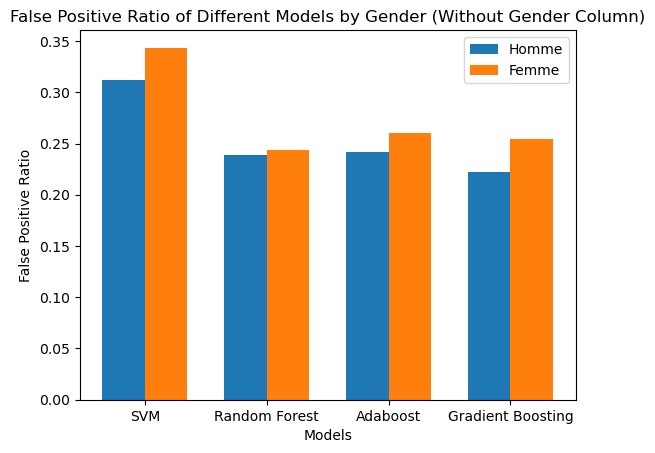

In [113]:
sFP_ratio_male = [sFP_svm_male, sFP_rf_male, sFP_ab_male, sFP_gb_male]
sFP_ratio_female = [sFP_svm_female, sFP_rf_female, sFP_ab_female, sFP_gb_female]

bar_width = 0.35
index = range(len(models))

fig, ax = plt.subplots()
bar1 = ax.bar(index, sFP_ratio_male, bar_width, label='Homme')
bar2 = ax.bar([i + bar_width for i in index], sFP_ratio_female, bar_width, label='Femme')

ax.set_xlabel('Models')
ax.set_ylabel('False Positive Ratio')
ax.set_title('False Positive Ratio of Different Models by Gender (Without Gender Column)')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(models)
ax.legend()

plt.show()

In [114]:
# False Negative FN/FN+TP
sFN_svm_male = (confusion_svm_male[1, 0] / (confusion_svm_male[0, 0] + confusion_svm_male[1, 0])) 
sFN_svm_female = (confusion_svm_female[1, 0] / (confusion_svm_female[0, 0] + confusion_svm_female[1, 0]))
sFN_rf_male = (confusion_rf_male[1, 0] / (confusion_rf_male[0, 0] + confusion_rf_male[1, 0]))
sFN_rf_female = (confusion_rf_female[1, 0]/(confusion_rf_female[0, 0] + confusion_rf_female[1, 0]))
sFN_ab_male = (confusion_ab_male[1, 0] / (confusion_ab_male[0, 0] + confusion_ab_male[1, 0])) 
sFN_ab_female = (confusion_ab_female[1, 0] / (confusion_ab_female[0, 0] + confusion_ab_female[1, 0]))
sFN_gb_male = (confusion_gb_male[1, 0] / (confusion_gb_male[0, 0] + confusion_gb_male[1, 0]))
sFN_gb_female = (confusion_gb_female[1, 0] / (confusion_gb_female[0, 0] + confusion_gb_female[1, 0]))

print("False Negative Ratio hommes et femmes sans SEX (SVM):\n", sFN_svm_male, "\n", sFN_svm_female)
print("False Negative Ratio hommes et femmes sans SEX (Random Forest):\n", sFN_rf_male, "\n", sFN_rf_female)
print("False Negative Ratio hommes et femmes sans SEX (AdaBoost):\n", sFN_ab_male, "\n", sFN_ab_female)
print("False Negative Ratio hommes et femmes sans SEX (Gradient Boosting):\n", sFN_gb_male, "\n", sFN_gb_female)

False Negative Ratio hommes et femmes sans SEX (SVM):
 0.27192336035372144 
 0.23765822784810126
False Negative Ratio hommes et femmes sans SEX (Random Forest):
 0.14216972878390202 
 0.12884333821376281
False Negative Ratio hommes et femmes sans SEX (AdaBoost):
 0.14813205907906168 
 0.14701653486700217
False Negative Ratio hommes et femmes sans SEX (Gradient Boosting):
 0.14175257731958762 
 0.12135922330097088


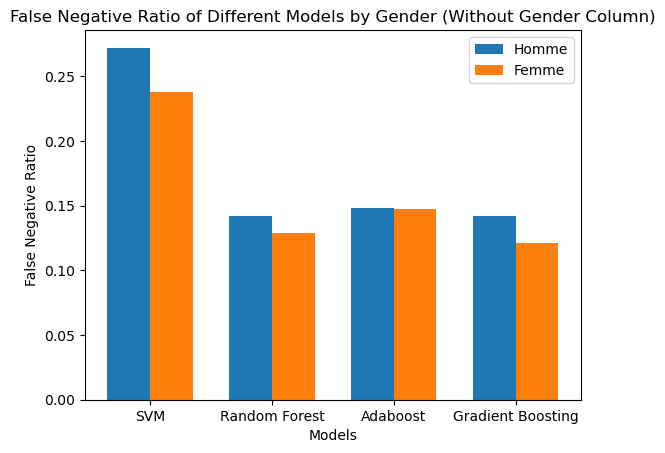

In [115]:
sFN_ratio_male = [sFN_svm_male, sFN_rf_male, sFN_ab_male, sFN_gb_male]
sFN_ratio_female = [sFN_svm_female, sFN_rf_female, sFN_ab_female, sFN_gb_female]

bar_width = 0.35
index = range(len(models))

fig, ax = plt.subplots()
bar1 = ax.bar(index, sFN_ratio_male, bar_width, label='Homme')
bar2 = ax.bar([i + bar_width for i in index], sFN_ratio_female, bar_width, label='Femme')

ax.set_xlabel('Models')
ax.set_ylabel('False Negative Ratio')
ax.set_title('False Negative Ratio of Different Models by Gender (Without Gender Column)')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(models)
ax.legend()

plt.show()

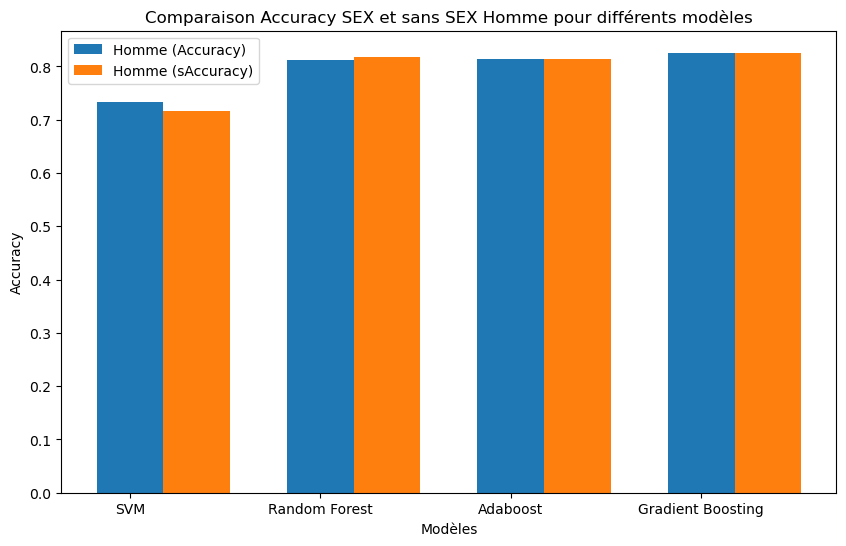

In [116]:
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, accuracy_test_male, bar_width, label='Homme (Accuracy)')
bar2 = ax.bar([i + bar_width for i in index], saccuracy_test_male, bar_width, label='Homme (sAccuracy)')
ax.set_xlabel('Modèles')
ax.set_ylabel('Accuracy')
ax.set_title('Comparaison Accuracy SEX et sans SEX Homme pour différents modèles')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend()

plt.show()

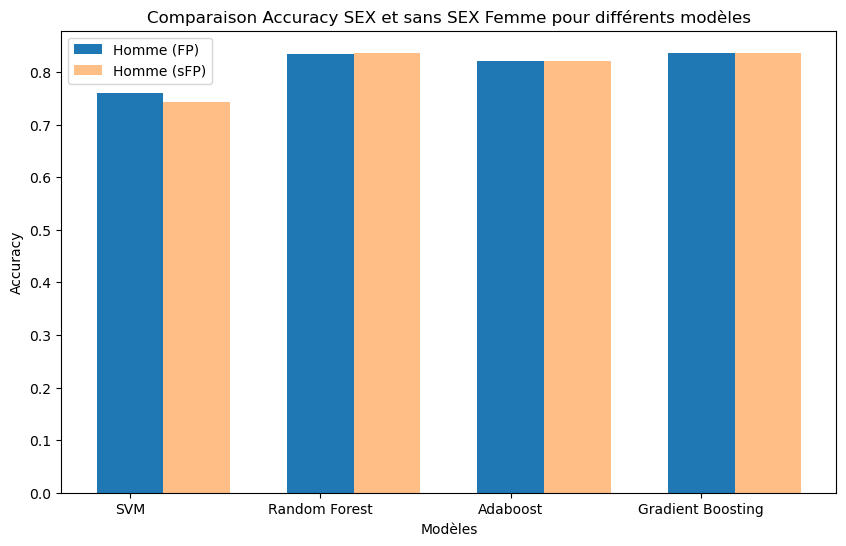

In [117]:
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, accuracy_test_female, bar_width, label='Homme (FP)')
bar2 = ax.bar([i + bar_width for i in index], saccuracy_test_female, bar_width, label='Homme (sFP)', alpha=0.5)

ax.set_xlabel('Modèles')
ax.set_ylabel('Accuracy')
ax.set_title('Comparaison Accuracy SEX et sans SEX Femme pour différents modèles')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend()

plt.show()

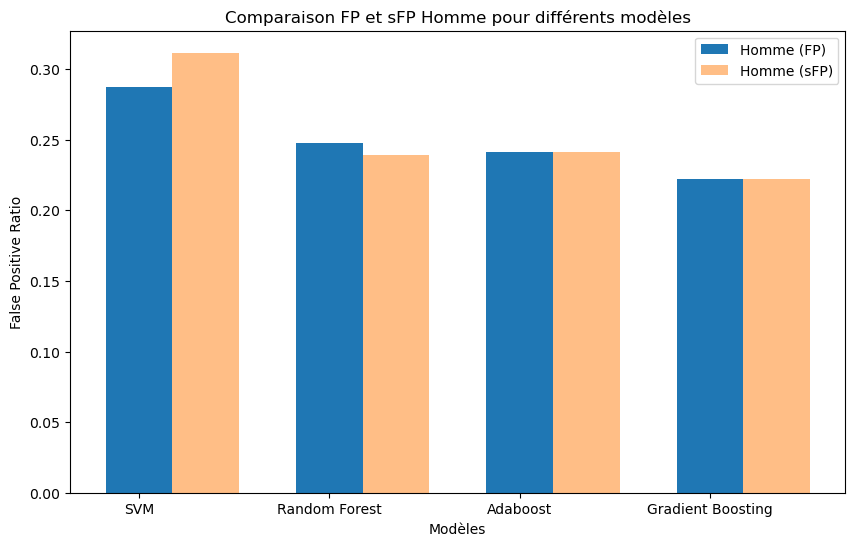

In [118]:
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, FP_ratio_male, bar_width, label='Homme (FP)')
bar2 = ax.bar([i + bar_width for i in index], sFP_ratio_male, bar_width, label='Homme (sFP)', alpha=0.5)

ax.set_xlabel('Modèles')
ax.set_ylabel('False Positive Ratio')
ax.set_title('Comparaison FP et sFP Homme pour différents modèles')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend()

plt.show()

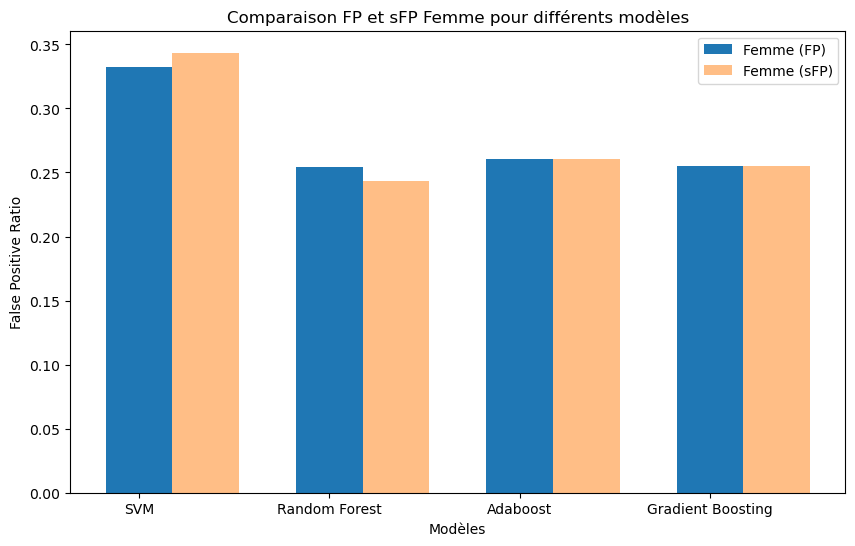

In [119]:
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, FP_ratio_female, bar_width, label='Femme (FP)')
bar2 = ax.bar([i + bar_width for i in index], sFP_ratio_female, bar_width, label='Femme (sFP)', alpha=0.5)

ax.set_xlabel('Modèles')
ax.set_ylabel('False Positive Ratio')
ax.set_title('Comparaison FP et sFP Femme pour différents modèles')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend()

plt.show()

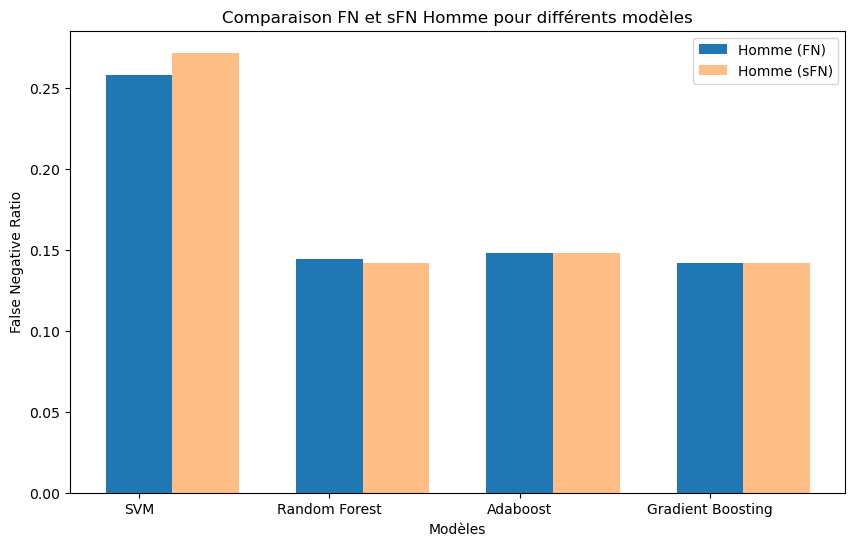

In [120]:
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, FN_ratio_male, bar_width, label='Homme (FN)')
bar2 = ax.bar([i + bar_width for i in index], sFN_ratio_male, bar_width, label='Homme (sFN)', alpha=0.5)

ax.set_xlabel('Modèles')
ax.set_ylabel('False Negative Ratio')
ax.set_title('Comparaison FN et sFN Homme pour différents modèles')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend()

plt.show()

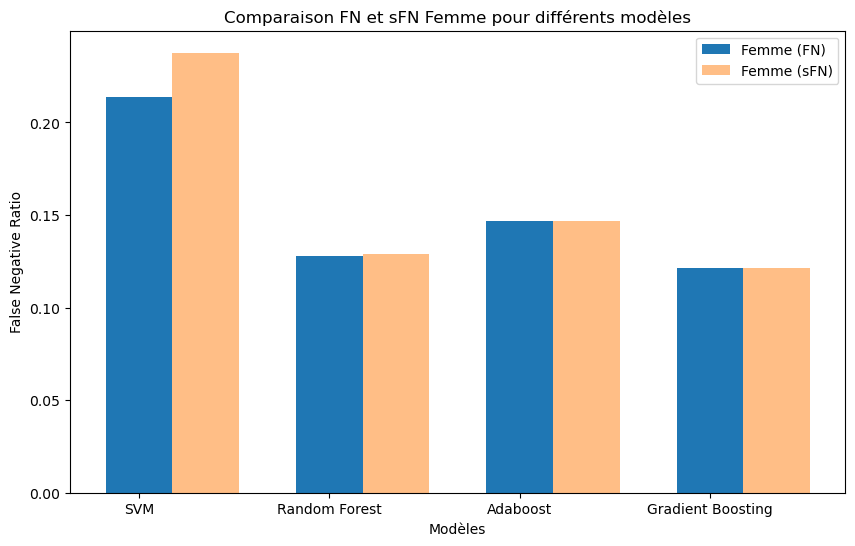

In [121]:
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, FN_ratio_female, bar_width, label='Femme (FN)')
bar2 = ax.bar([i + bar_width for i in index], sFN_ratio_female, bar_width, label='Femme (sFN)', alpha=0.5)
ax.set_xlabel('Modèles')
ax.set_ylabel('False Negative Ratio')
ax.set_title('Comparaison FN et sFN Femme pour différents modèles')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend()

plt.show()